# Get the data

In [145]:
import os
import tarfile
from six.moves import urllib
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer

%matplotlib inline

## Download data

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
housing = pd.read_csv('datasets/housing/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

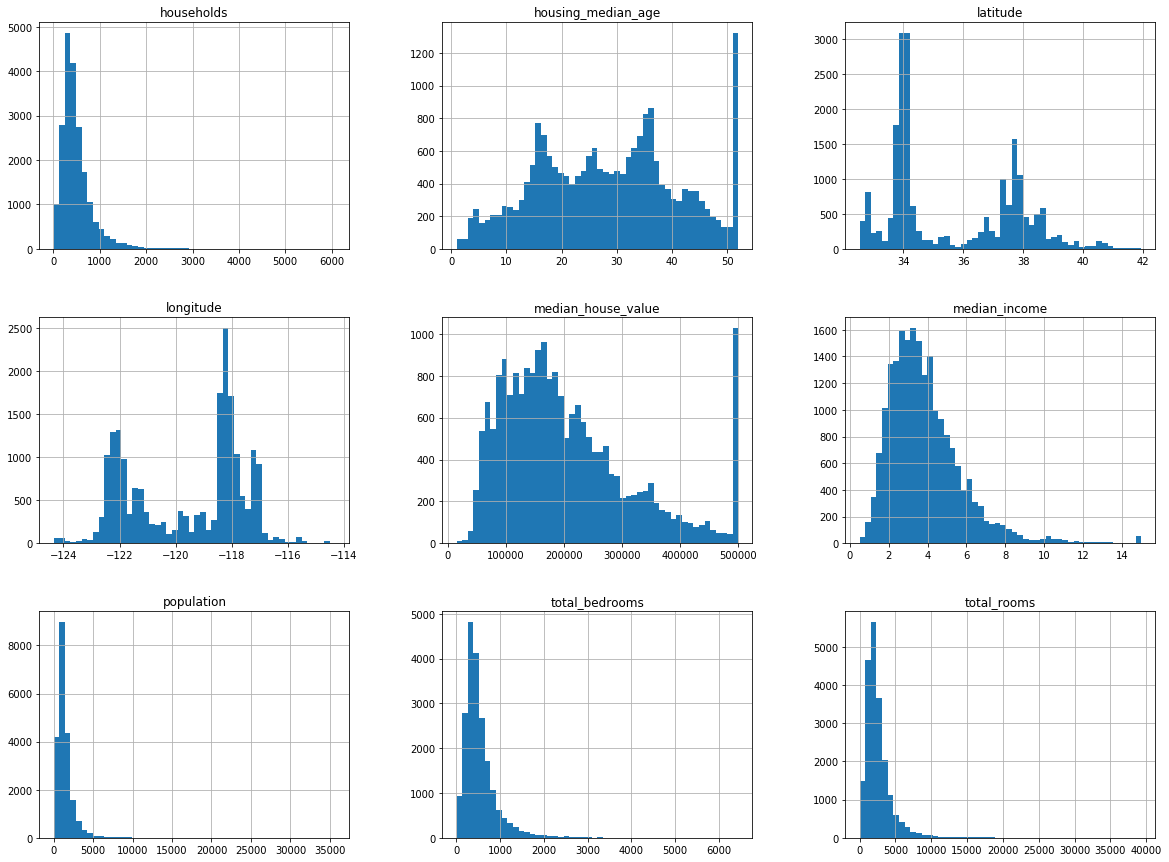

In [20]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Create a test set

In [33]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [34]:
train_set, test_set = split_train_test(housing, .2)
print(f"Train set: {len(train_set)}, Test_set: {len(test_set)}")

Train set: 16512, Test_set: 4128


In [35]:
housing_with_id = housing.reset_index()
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [36]:
housing_with_id['id'] = housing.longitude * 1000 + housing.latitude
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


In [39]:
train_set, test_set = train_test_split(housing, test_size=.3, random_state=32)
print(f"Train set: {len(train_set)}, Test_set: {len(test_set)}")

Train set: 14448, Test_set: 6192


In [45]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [46]:
housing['income_cat'] = np.ceil(housing.median_income / 1.5)
#  Replace values where the condition is False.
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

In [47]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


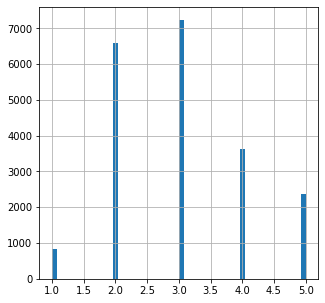

In [56]:
housing.income_cat.hist(bins=50,figsize=(5,5))

In [59]:
split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=32)
for train_index, test_index in split.split(housing, housing.income_cat):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

# Discover and visualize the data to gain insights

## Visualizing geographical data

In [68]:
housing = strat_train_set.copy()

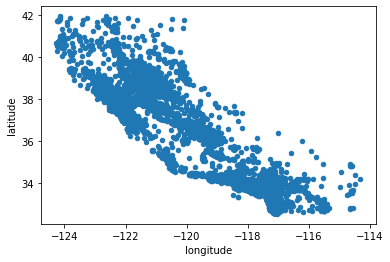

In [74]:
housing.plot(kind='scatter', x='longitude', y='latitude')
plt.show()

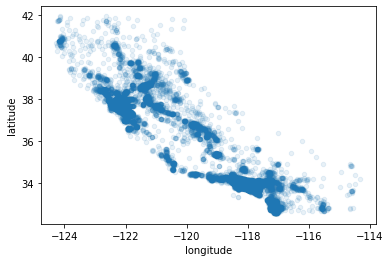

In [75]:
#  visulize a high density of data points
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=.1)
plt.show()

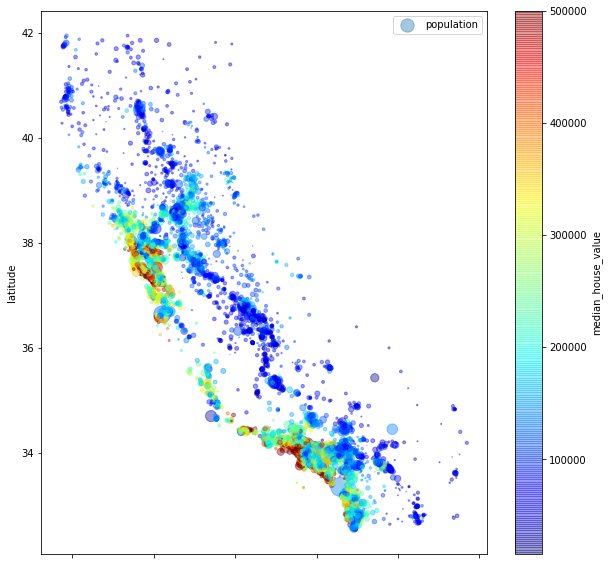

In [78]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=.4,
            s=housing.population/100, label='population',
            c='median_house_value', cmap=plt.get_cmap('jet'),colorbar=True,
            figsize=(10,10))
plt.legend()
plt.show()

## Looking for correlations

In [79]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925203,-0.114777,0.049237,0.071879,0.103945,0.058498,-0.007635,-0.044055
latitude,-0.925203,1.000000,0.016568,-0.041053,-0.070173,-0.112745,-0.074814,-0.086110,-0.145770
housing_median_age,-0.114777,0.016568,1.000000,-0.361253,-0.319740,-0.294958,-0.302320,-0.114157,0.111455
total_rooms,0.049237,-0.041053,-0.361253,1.000000,0.929467,0.852816,0.916997,0.197515,0.133901
total_bedrooms,0.071879,-0.070173,-0.319740,0.929467,1.000000,0.873849,0.979594,-0.009789,0.050326
population,0.103945,-0.112745,-0.294958,0.852816,0.873849,1.000000,0.904211,0.000864,-0.026850
households,0.058498,-0.074814,-0.302320,0.916997,0.979594,0.904211,1.000000,0.010550,0.066245
median_income,-0.007635,-0.086110,-0.114157,0.197515,-0.009789,0.000864,0.010550,1.000000,0.684207
median_house_value,-0.044055,-0.145770,0.111455,0.133901,0.050326,-0.026850,0.066245,0.684207,1.000000


In [83]:
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.684207
total_rooms           0.133901
housing_median_age    0.111455
households            0.066245
total_bedrooms        0.050326
population           -0.026850
longitude            -0.044055
latitude             -0.145770
Name: median_house_value, dtype: float64

In [95]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

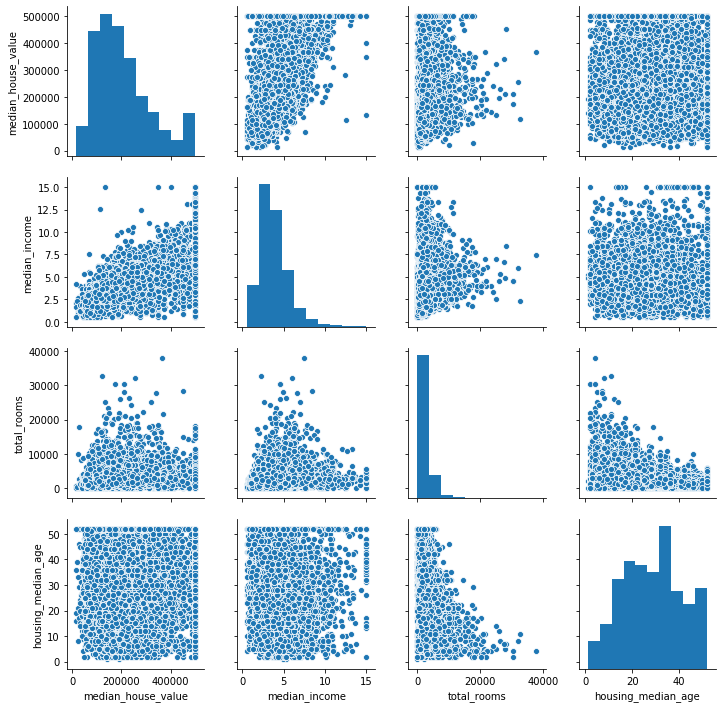

In [97]:
sns.pairplot(housing[attributes],height=2.5)

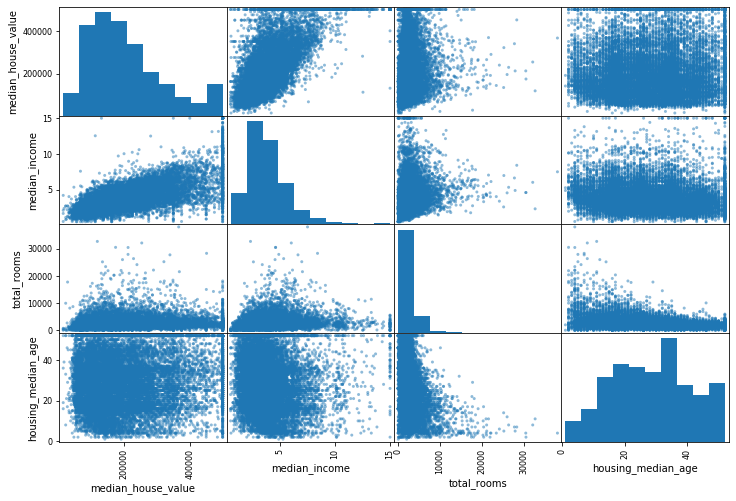

In [99]:
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

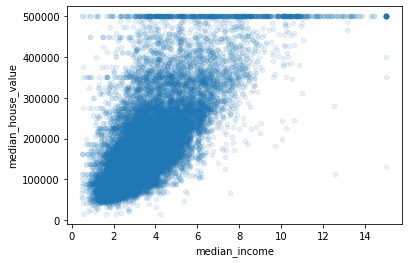

In [100]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=.1)

## Experimenting with attribute combinations

In [101]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [102]:
corr_matrix = housing.corr()
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value          1.000000
median_income               0.684207
rooms_per_household         0.166679
total_rooms                 0.133901
housing_median_age          0.111455
households                  0.066245
total_bedrooms              0.050326
population                 -0.026850
population_per_household   -0.033081
longitude                  -0.044055
latitude                   -0.145770
bedrooms_per_room          -0.250069
Name: median_house_value, dtype: float64

# Prepare the Data for Machine Learning Algorithms

In [107]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_label = strat_train_set.median_house_value.copy()

In [108]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
15566,-117.05,33.10,13.0,5516.0,746.0,2119.0,662.0,6.1868,<1H OCEAN
4469,-118.16,34.09,50.0,1568.0,302.0,1093.0,333.0,3.1442,<1H OCEAN
18984,-121.99,38.26,18.0,921.0,126.0,368.0,120.0,6.0842,INLAND
1854,-124.19,41.78,15.0,3140.0,714.0,1645.0,640.0,1.6654,NEAR OCEAN
15038,-117.00,32.76,31.0,2545.0,373.0,956.0,342.0,4.3977,<1H OCEAN


## Data Cleaning
Deal with missing value

In [113]:
imputer = Imputer(strategy='median')

In [125]:
# Deal with numbers
housing_num = housing.drop('ocean_proximity', axis=1)

In [130]:
# Computer all attributes's median value
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [116]:
imputer.statistics_

array([-118.5   ,   34.26  ,   29.    , 2131.5   ,  436.    , 1167.    ,
        410.    ,    3.5313])

In [118]:
housing_num.median().values

array([-118.5   ,   34.26  ,   29.    , 2131.5   ,  436.    , 1167.    ,
        410.    ,    3.5313])

In [129]:
# fill in missing value with median value
X = imputer.transform(housing_num)

In [127]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [128]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-117.05,33.10,13.0,5516.0,746.0,2119.0,662.0,6.1868
1,-118.16,34.09,50.0,1568.0,302.0,1093.0,333.0,3.1442
2,-121.99,38.26,18.0,921.0,126.0,368.0,120.0,6.0842
3,-124.19,41.78,15.0,3140.0,714.0,1645.0,640.0,1.6654
4,-117.00,32.76,31.0,2545.0,373.0,956.0,342.0,4.3977


## Handling Text and Categorical Attributes
text --> LabelEncoder() --> OneHotEncoder()

In [139]:
encoder = LabelEncoder()

In [140]:
housing_cat = housing.ocean_proximity
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded, np.unique(housing_cat_encoded)

(array([0, 0, 1, ..., 0, 3, 1]), array([0, 1, 2, 3, 4]))

In [141]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [142]:
encoder = OneHotEncoder(categories='auto')
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [143]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

In [144]:
housing.to_numpy()

array([[-117.05, 33.1, 13.0, ..., 662.0, 6.1868, '<1H OCEAN'],
       [-118.16, 34.09, 50.0, ..., 333.0, 3.1442, '<1H OCEAN'],
       [-121.99, 38.26, 18.0, ..., 120.0, 6.0842, 'INLAND'],
       ...,
       [-118.31, 33.91, 31.0, ..., 289.0, 3.8173, '<1H OCEAN'],
       [-122.24, 38.11, 52.0, ..., 463.0, 3.0507, 'NEAR BAY'],
       [-117.62, 34.11, 17.0, ..., 262.0, 6.148, 'INLAND']], dtype=object)

or in one move: text --> OneHotEncoder()

In [146]:
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0]])